In [1]:
import pandas as pd
from pysyncon import Dataprep, RobustSynth

In [2]:
df = pd.read_csv("../../data/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Aragon",
        "Baleares (Islas)",
        "Andalucia",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
        "Spain (Espana)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

robust = RobustSynth()
robust.fit(dataprep, lambda_=0.1, sv_count=2)

In [3]:
robust.weights()

Aragon                          0.037
Baleares (Islas)                0.089
Andalucia                       0.051
Canarias                        0.024
Cantabria                       0.128
Castilla Y Leon                 0.000
Castilla-La Mancha             -0.029
Cataluna                        0.168
Comunidad Valenciana            0.094
Extremadura                    -0.029
Galicia                        -0.004
Madrid (Comunidad De)           0.304
Murcia (Region de)              0.033
Navarra (Comunidad Foral De)    0.036
Principado De Asturias          0.141
Rioja (La)                      0.012
Spain (Espana)                  0.075
Name: weights, dtype: float64

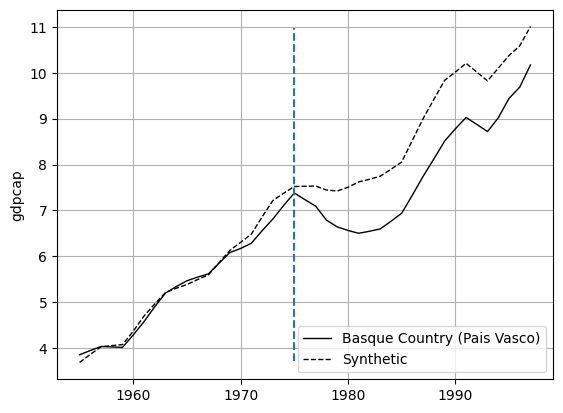

In [4]:
robust.path_plot(time_period=range(1955, 1998), treatment_time=1975)

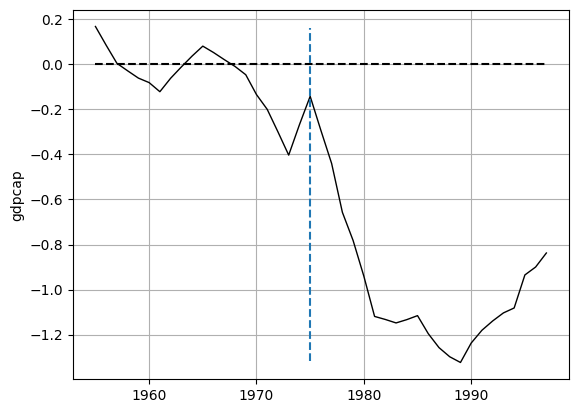

In [5]:
robust.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)

In [6]:
robust.summary()

,treated,synthetic,sample mean
school.illit,39.888,370.122,323.826
school.prim,1031.742,2957.491,2182.453
school.med,90.359,247.817,148.864
school.high,25.728,70.820,47.133
school.post.high,13.480,45.090,26.163
invest,24.647,24.549,21.445
special.1.gdpcap,5.285,5.299,3.584
special.2.sec.agriculture,6.844,11.848,21.058
special.3.sec.energy,4.106,5.676,5.252
special.4.sec.industry,45.082,31.441,22.670
